In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [13]:
path = "data/clean/adult_cleaned_3.csv"
data = pd.read_csv(path)

# use to test and display first couple of rows from loaded data
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
income_mapping = {'<=50K': 'Below 50k', '>50K': 'Above 50k'}
data.loc[:, 'salary_level'] = data['income'].map(income_mapping)


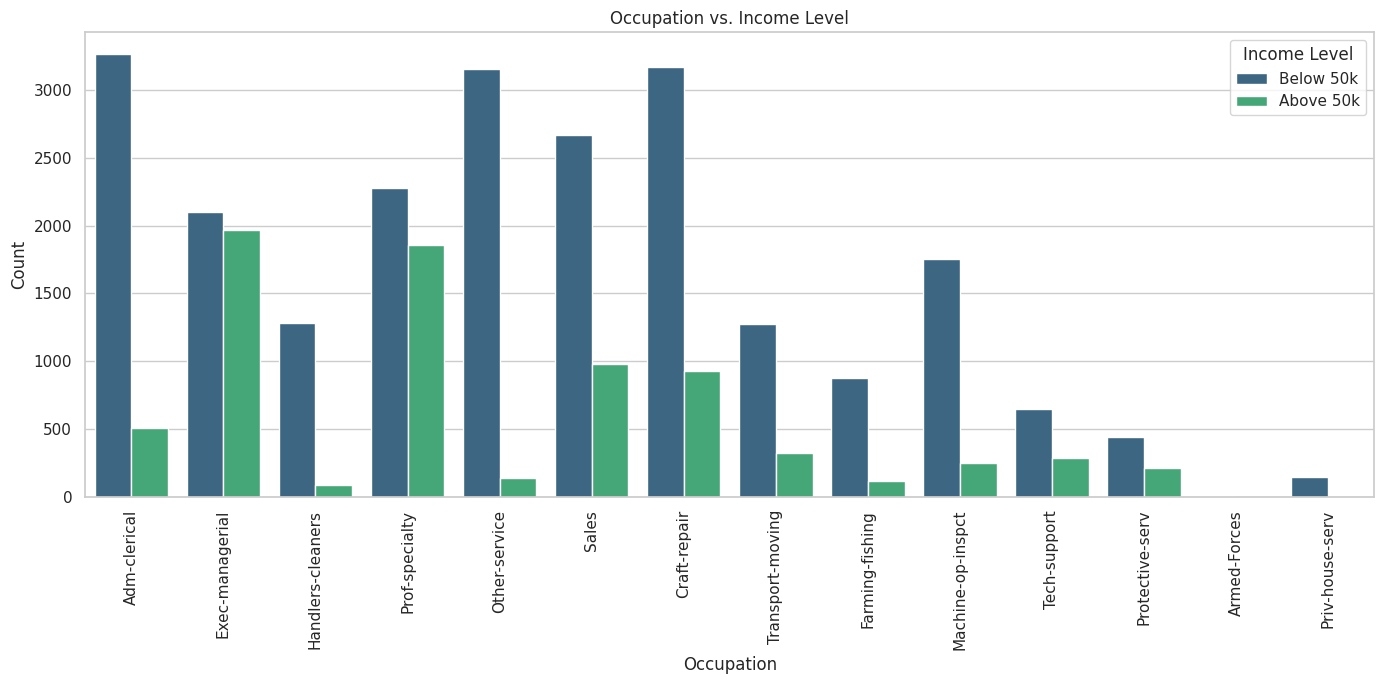

In [5]:
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='occupation', hue='salary_level', palette='viridis')
plt.title('Occupation vs. Income Level')
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Income Level')
plt.tight_layout()
plt.show()

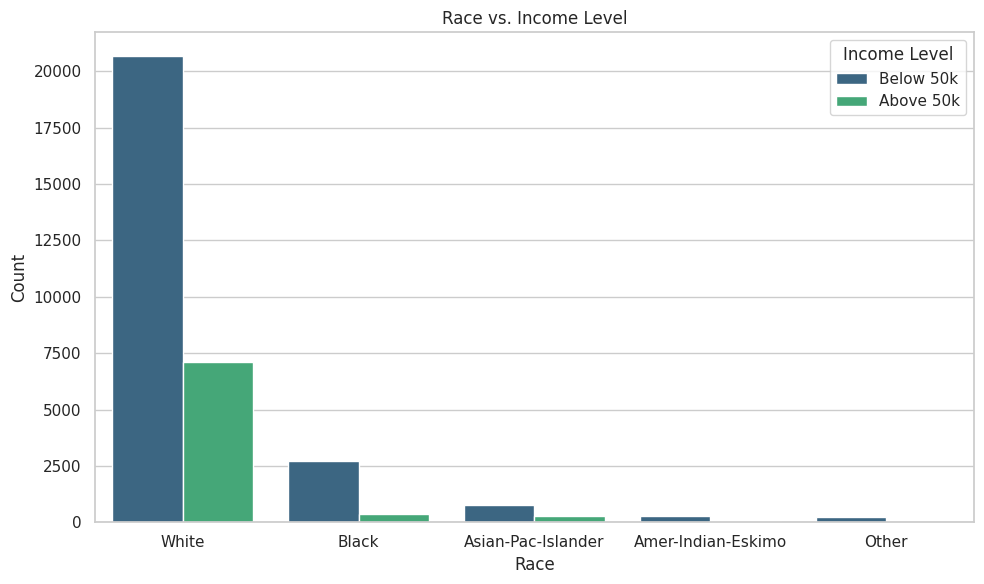

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='race', hue='salary_level', palette='viridis')
plt.title('Race vs. Income Level')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income Level')
plt.tight_layout()
plt.show()

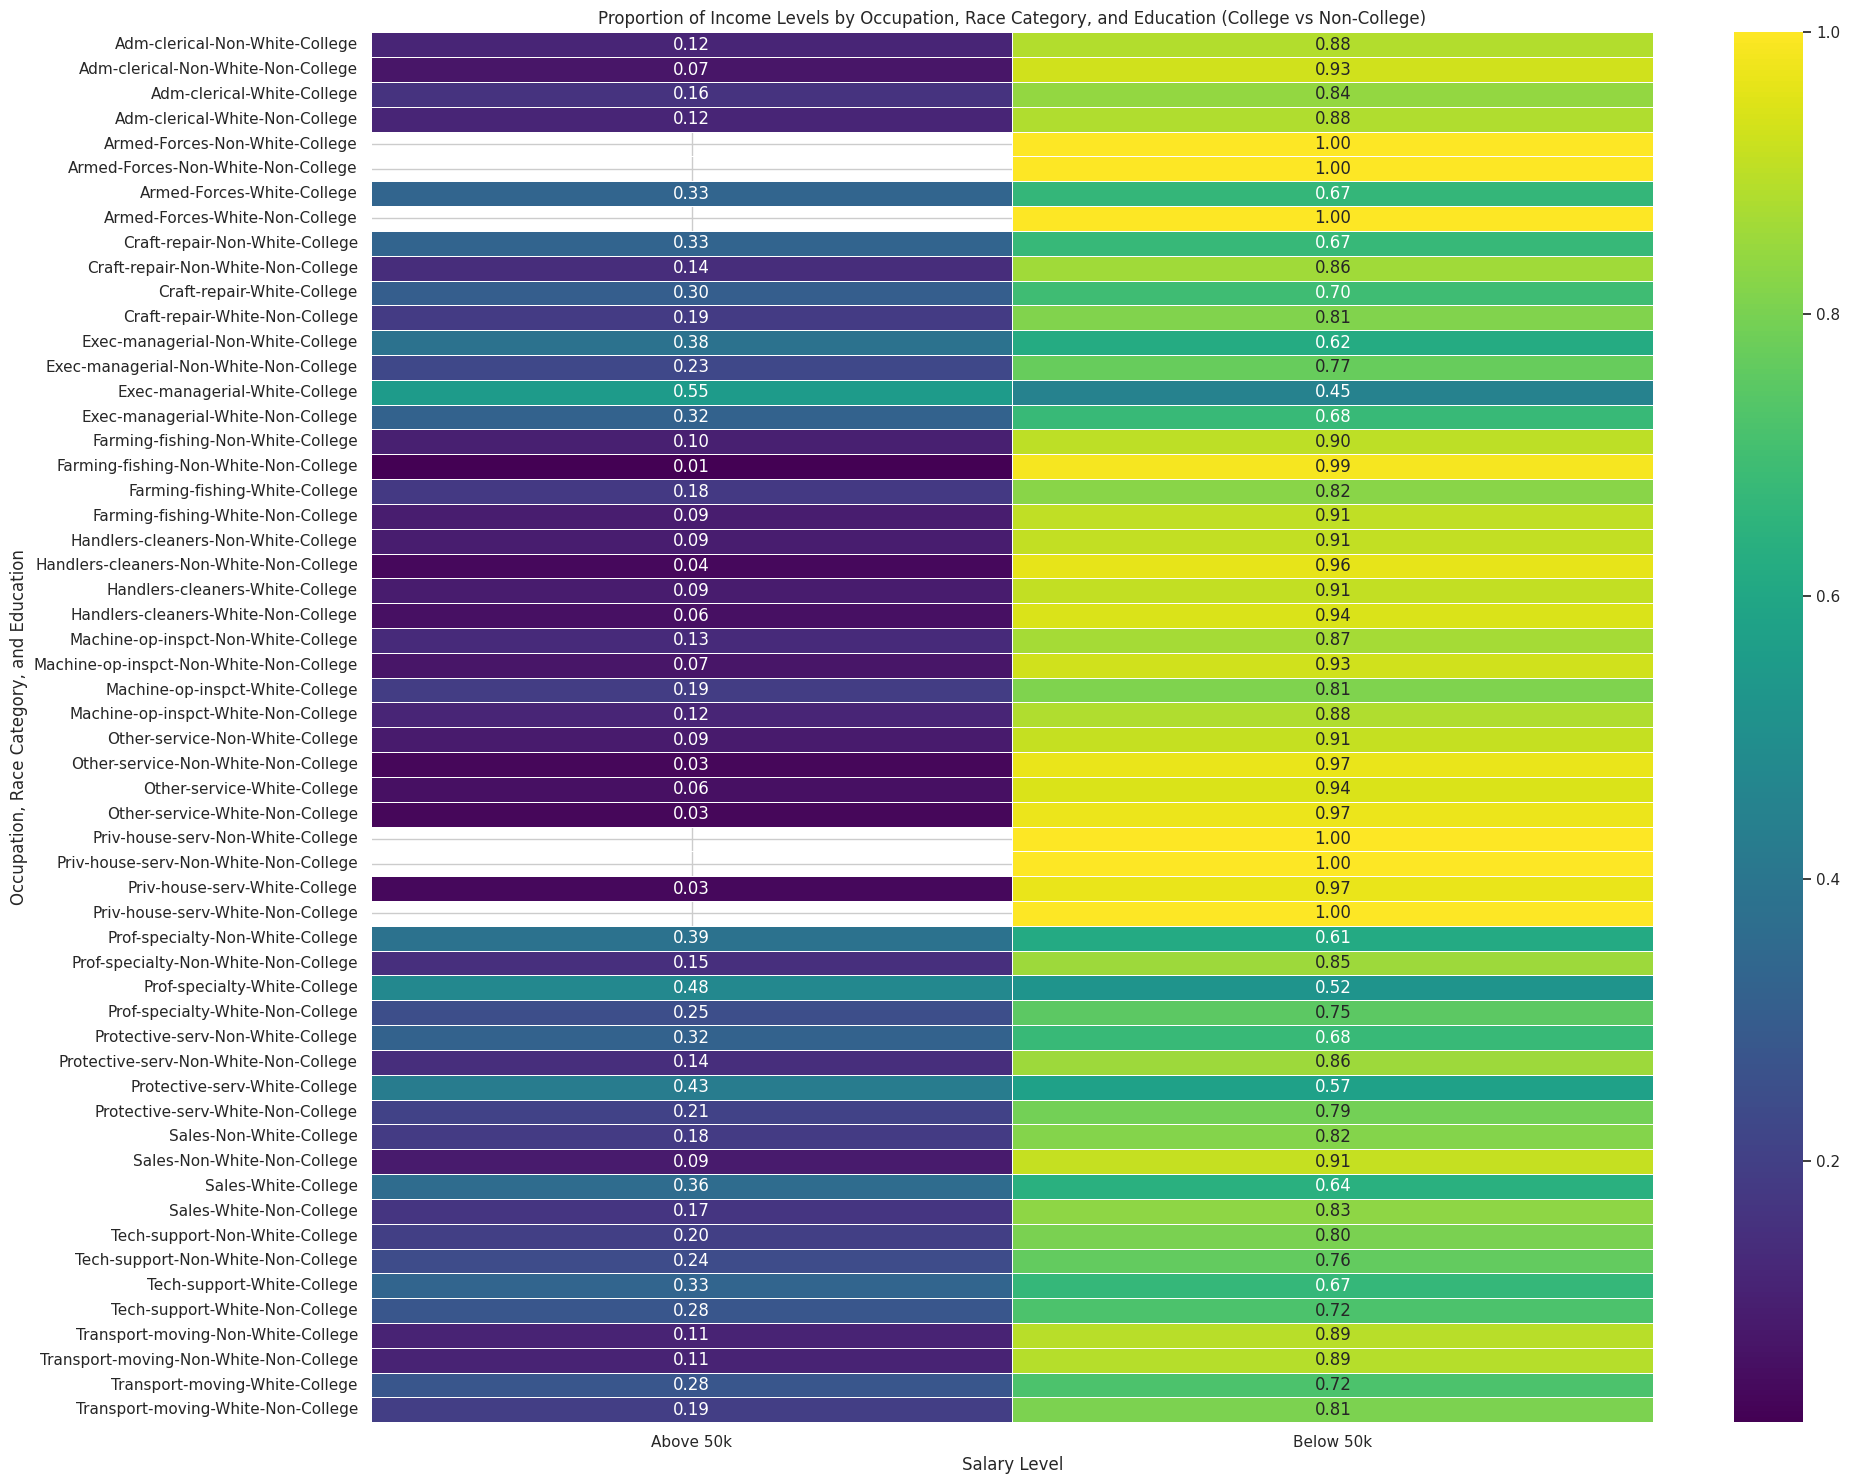

In [68]:
sns.set(style='whitegrid')
# Categorize races into "White" and "Non-White"
data['race_category'] = data['race'].apply(lambda x: 'White' if x == 'White' else 'Non-White')

# Categorize education levels into "college" and "non-college"
college_education = ['Bachelors', 'Some-college', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
data['education_category'] = data['education'].apply(lambda x: 'College' if x in college_education else 'Non-College')

# Create frame by aggregating salary count by occupation, race category, and education category
temp = data.groupby(["occupation", "race_category", "education_category"])["salary_level"].value_counts().to_frame(name='count').reset_index()

# Calculate the total count for each group of race_category, education_category, and occupation
group_totals = temp.groupby(['occupation', 'race_category', 'education_category'])['count'].transform('sum')

# Calculate the proportion of each count within its group
temp['proportion'] = temp['count'] / group_totals

# Pivot the data to get it into a format suitable for a heatmap
heatmap_data = temp.pivot_table(index=['occupation', 'race_category', 'education_category'], columns='salary_level', values='proportion', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)

# Set plot labels and title
plt.title('Proportion of Income Levels by Occupation, Race Category, and Education (College vs Non-College)')
plt.xlabel('Salary Level')
plt.ylabel('Occupation, Race Category, and Education')
plt.tight_layout()
plt.show()

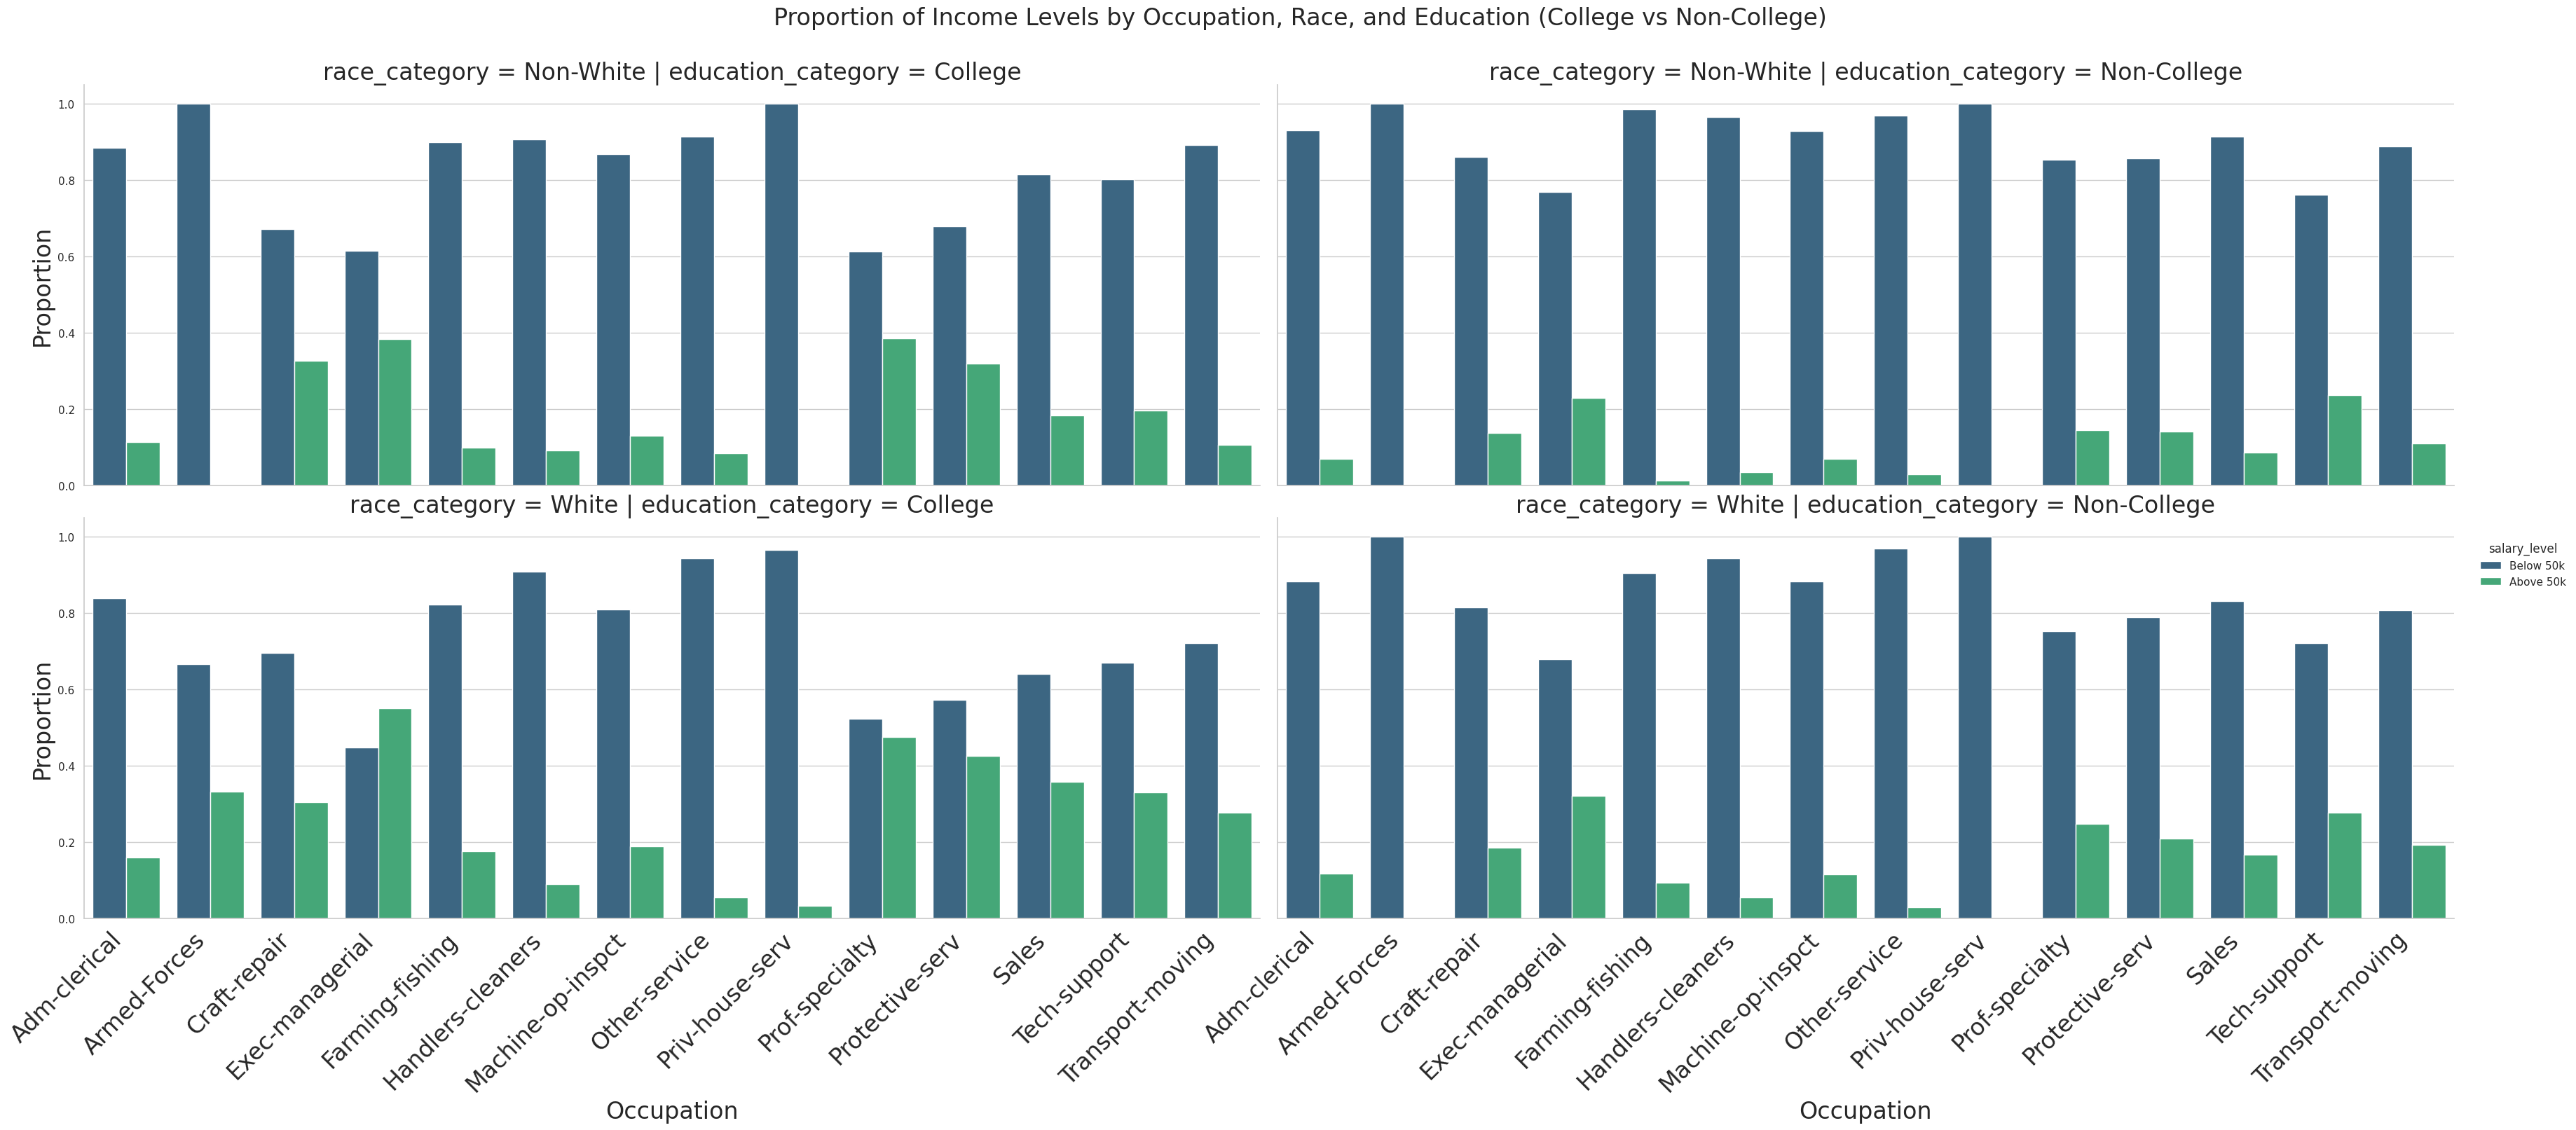

In [33]:
# Create frame by aggregating salary count by occupation, race category, and education category
temp = data.groupby(["occupation", "race_category", "education_category"])["salary_level"].value_counts().to_frame(name='count').reset_index()

# Calculate the total count for each group of race_category, education_category, and occupation
group_totals = temp.groupby(['occupation', 'race_category', 'education_category'])['count'].transform('sum')

# Calculate the proportion of each count within its group
temp['proportion'] = temp['count'] / group_totals

# Create side-by-side bar plots
g = sns.catplot(data=temp, x='occupation', y='proportion', hue='salary_level', col='education_category', row='race_category', kind='bar', height=7, aspect=2.5, palette='viridis')

# Adjust x-tick labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
        label.set_fontsize(24)

# Set titles and labels
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.set_xlabel(ax.get_xlabel(), fontsize=24)
    ax.set_ylabel(ax.get_ylabel(), fontsize=24)
g.set_axis_labels("Occupation", "Proportion",fontsize=24)

# Adjust layout and title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Proportion of Income Levels by Occupation, Race, and Education (College vs Non-College)', fontsize=24)
plt.show()

KeyError: 'College'

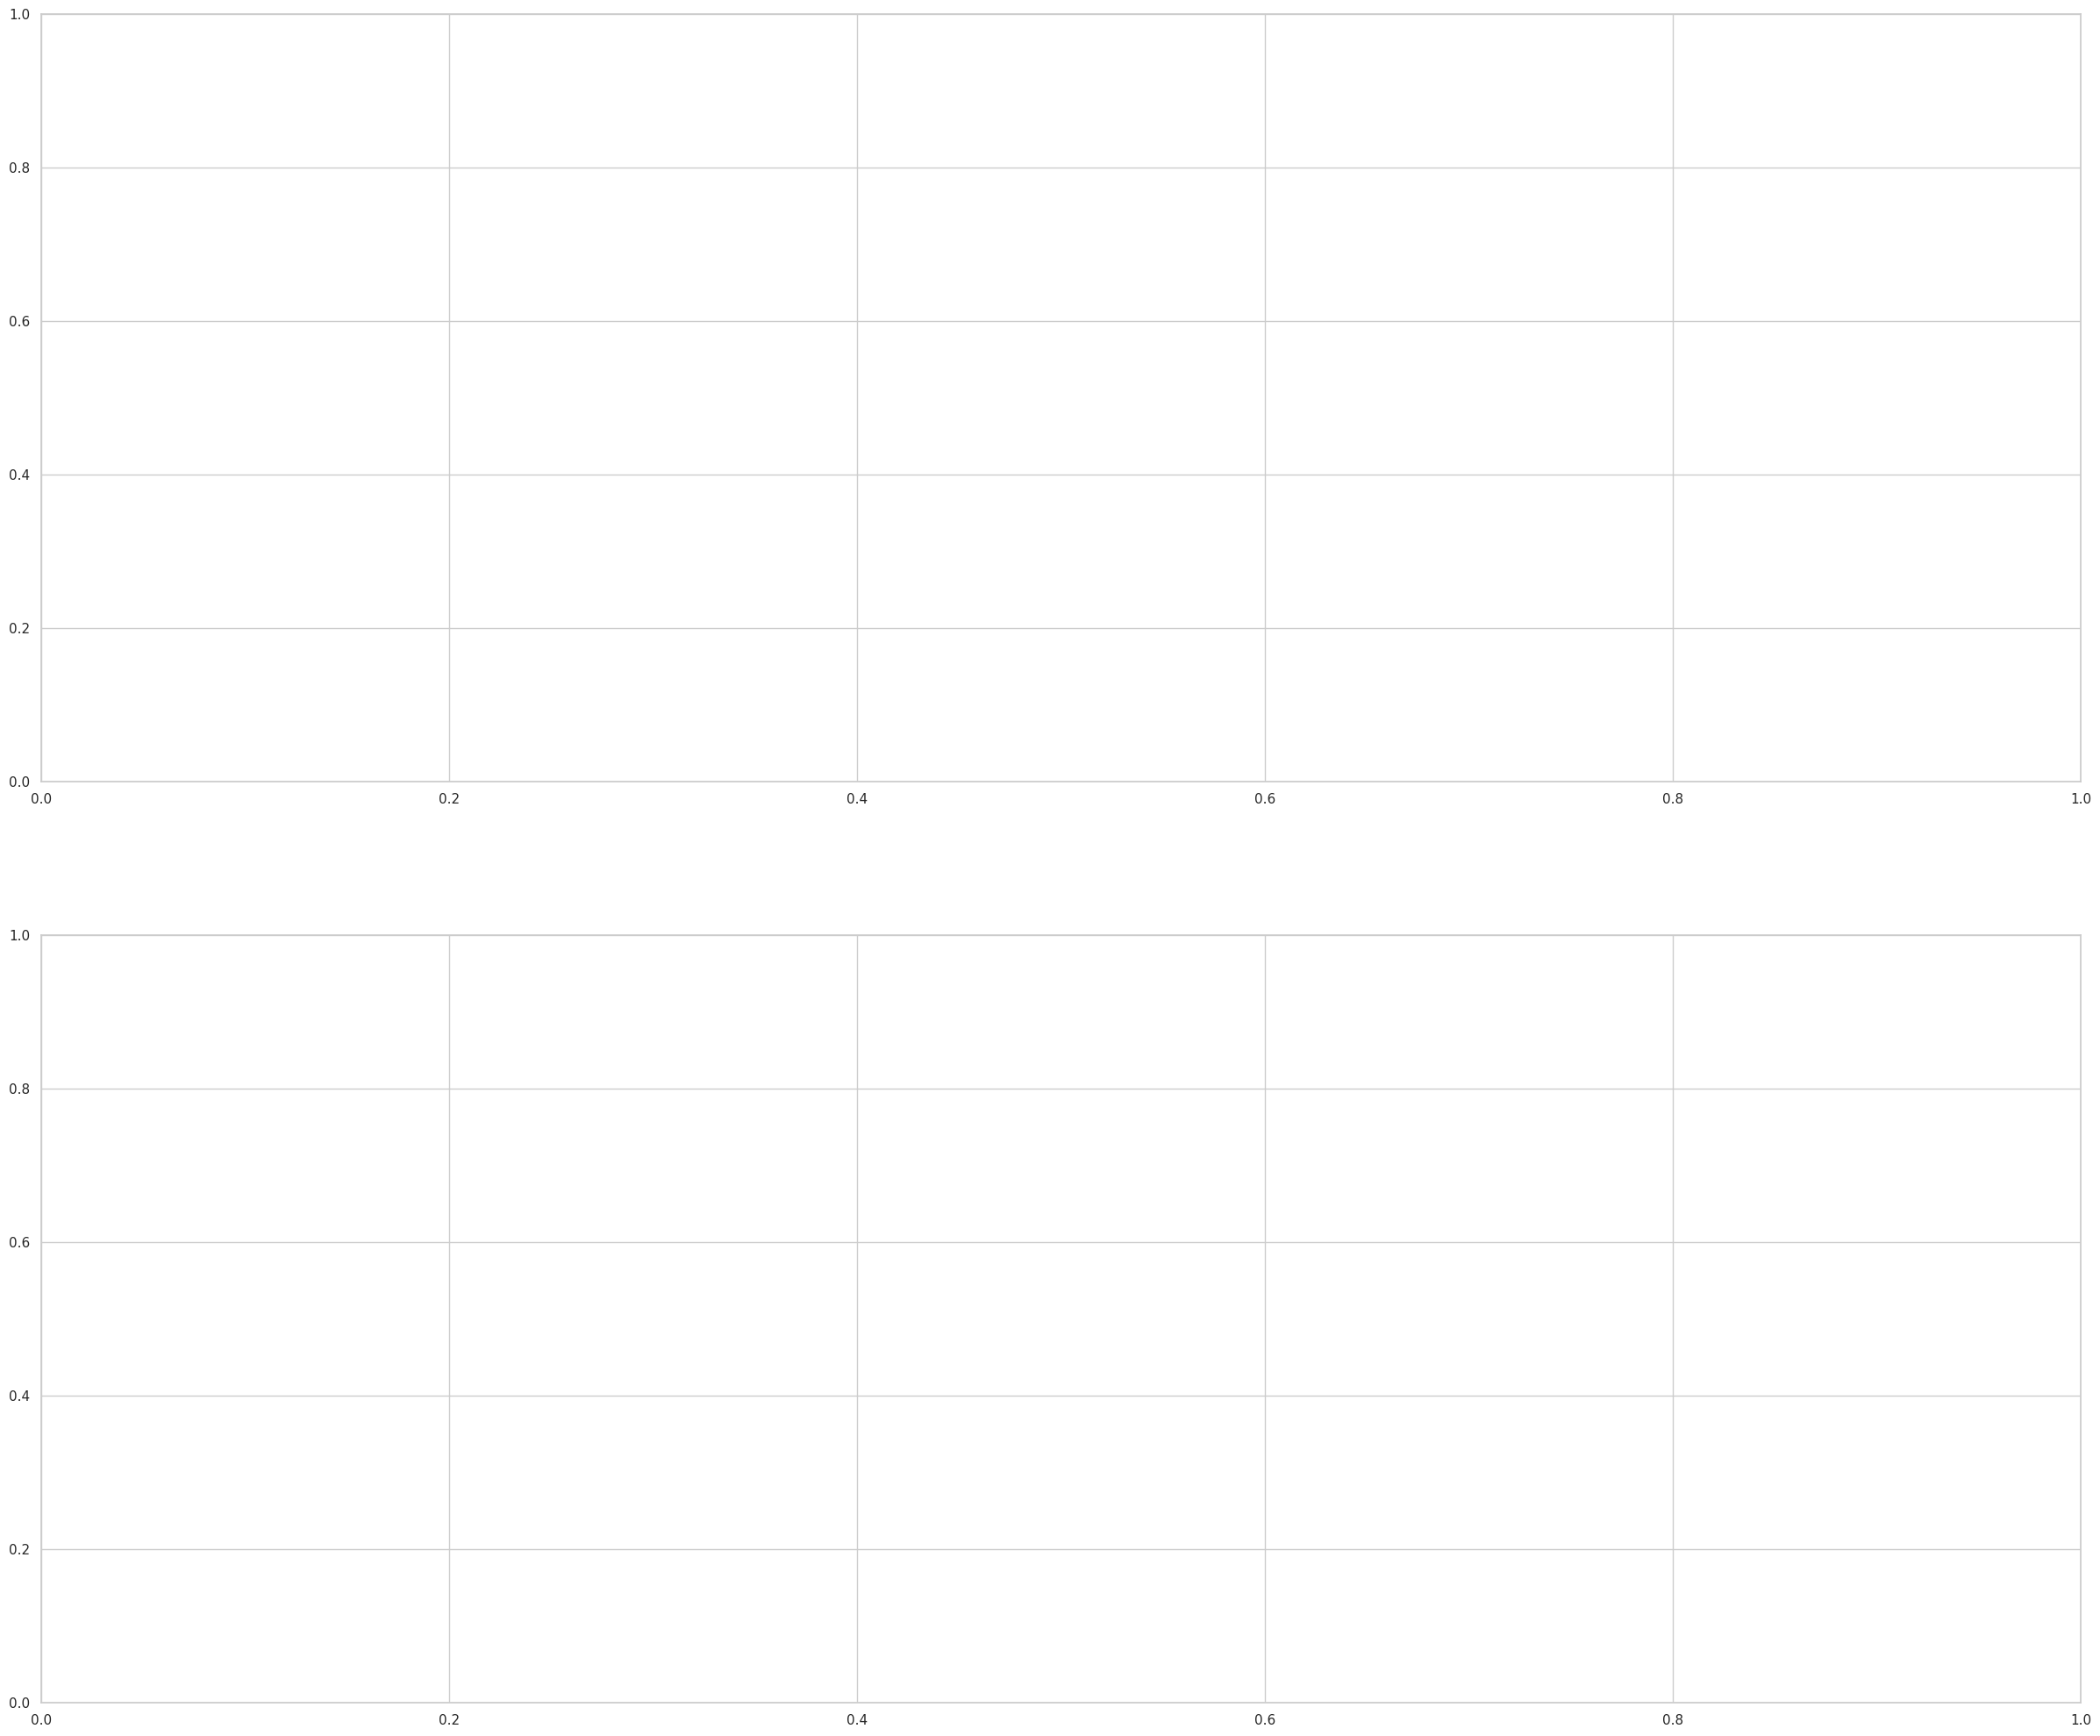

In [79]:
# Create frame by aggregating salary count by occupation, race category, and education category, and calculate proportions
temp = data.groupby(["occupation", "race_category", "education_category", "salary_level"]).size().unstack().fillna(0)
temp = temp.div(temp.sum(axis=1), axis=0)

# Create top-bottom subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 25), sharey=True)

# Categorize education levels into "college" and "non-college"
college_education = ['Bachelors', 'Some-college', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
data['education_category'] = data['education'].apply(lambda x: 'College' if x in college_education else 'Non-College')

# College plot
college_data = temp.loc[(slice(None), slice(None), 'College'), :].unstack(level=1)
college_data.plot(kind='barh', stacked=True, ax=ax1, colormap='viridis')
ax1.set_title('Proportion of Income Levels by Occupation, Race, and Education (College)', fontsize=24)
ax1.set_xlabel('Proportion', fontsize=18)
ax1.set_ylabel('Occupation and Race Category', fontsize=18)
ax1.legend(title='Salary Level', fontsize=18)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=24)

# Non-College plot
non_college_data = temp.loc[(slice(None), slice(None), 'Non-College'), :].unstack(level=1)
non_college_data.plot(kind='barh', stacked=True, ax=ax2, colormap='viridis')
ax2.set_title('Proportion of Income Levels by Occupation, Race, and Education (Non-College)', fontsize=24)
ax2.set_xlabel('Proportion', fontsize=18)
ax2.set_ylabel('Occupation and Race Category', fontsize=18)
ax2.legend(title='Salary Level', fontsize=18)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=24)

plt.tight_layout()
plt.show()